<a href="https://colab.research.google.com/github/jadrzy/ProjectPythonForMachineLearning/blob/main/notebooks/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import and data divison**

In [2]:
import seaborn as sns
from time import time
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
MinMaxScaler,
StandardScaler,
)

!git clone https://{token}@github.com/jadrzy/PythonForMachineLearning.git

model_data = pd.read_csv("/content/PythonForMachineLearning/datasets/model_data.csv")
analize_data = pd.read_csv("/content/PythonForMachineLearning/datasets/analyze_data.csv")

analyze_data = analize_data.drop(['ID'], axis=1)
model_data = model_data.drop(['ID'], axis=1)

selected_model_data = model_data.copy()
selected_model_data = selected_model_data.loc[:, ~model_data.columns.str.startswith('Ethnicity')].drop(['Semeron', 'Country_Australia', 'Country_Canada', 'Country_New Zealand', 'Country_Other', 'Country_Republic of Ireland', 'Alcohol', 'Caffeine', 'Chocolate'], axis=1)

X1= selected_model_data.drop(['Age', 'Gender', 'Education', 'Neuroticism', 'Extraversion',
       'Openness to experience', 'Agreeableness', 'Conscientiousness',
       'Impulsiveness', 'Sensation seeking', 'Country_UK', 'Country_USA'], axis=1)

X2= selected_model_data.drop(['Cocaine', 'Crack', 'Ecstasy', 'Heroin',
       'Ketamine', 'Legal highs', 'LSD', 'Meth', 'Mushrooms', 'Nicotine',
       'Volatile substance abuse'], axis=1)

y= selected_model_data['Cannabis']

X_train, X_test, y_train, y_test= train_test_split(X2, y, test_size=0.4,random_state=1 )
X_valid, X_test, y_valid, y_test= train_test_split(X_test, y_test, test_size=0.5,random_state=1 )



Cloning into 'PythonForMachineLearning'...
remote: Enumerating objects: 295, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 295 (delta 74), reused 3 (delta 3), pack-reused 158 (from 1)
Receiving objects: 100% (295/295), 13.42 MiB | 2.92 MiB/s, done.
Resolving deltas: 100% (132/132), done.
Updating files: 100% (20/20), done.


# **Classifiction for drugs**

## Logistic Regression

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test= train_test_split(X1, y, test_size=0.2,random_state=1 )
X_valid, X_test, y_valid, y_test= train_test_split(X_test, y_test, test_size=0.5,random_state=1 )

y_train = X_train['Cannabis'] == 0
y_valid = X_valid['Cannabis'] == 0

X_train = X_train.drop(columns=['Cannabis'])
X_valid = X_valid.drop(columns=['Cannabis'])

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_valid)

acc_train = accuracy_score(y_train, y_pred_train)
acc_val = accuracy_score(y_valid, y_pred)

print(f'Accuracy on train set for Cannabis: {acc_train}')
print(f'Accuracy on validation set for Cannabis: {acc_val}')

Accuracy on train set for Cannabis: 0.8818845388188454
Accuracy on validation set for Cannabis: 0.8514588859416445


## CV - MLPClassifier + Grid Search

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from imblearn.over_sampling import SMOTE

pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

X_train, X_test, y_train, y_test= train_test_split(X1, y, test_size=0.2, random_state=1)

target_class = 2

# ratio = len(X_train[X_train['Cannabis'] != target_class]) / len(X_train[X_train['Cannabis'] == target_class])
# sample_weight = np.ones(len(X_train))
# sample_weight[X_train['Cannabis'] == target_class] = ratio

y_train = X_train['Cannabis'] == target_class
X_train = X_train.drop(columns=['Cannabis'])

# sm = SMOTE()
# X_train, y_train = sm.fit_resample(X_train, y_train)

# clf = svm.SVC()
# parameters =  {'kernel':('linear', 'rbf', 'poly'), 'C':[0.1, 1, 10]}

clf = MLPClassifier()
parameters =  {'solver':('sgd', 'lbfgs', 'adam'), 'hidden_layer_sizes':[(5,5), (10,5)], 'max_iter': [200, 500, 1000]}

grid_search = GridSearchCV(clf, parameters, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res['params'] = cv_res['params'].apply(lambda x: ', '.join([f'{k}={v}' for k, v in x.items()]))
selected_columns = ['params', 'mean_test_score', 'rank_test_score']
sorted_results = cv_res[selected_columns].sort_values(by=['rank_test_score'])
display(sorted_results[selected_columns])
# display(cv_res)

,params,mean_test_score,rank_test_score
0,"hidden_layer_sizes=(5, 5), max_iter=200, solver=sgd",0.833077,1
4,"hidden_layer_sizes=(5, 5), max_iter=500, solver=lbfgs",0.826154,2
8,"hidden_layer_sizes=(5, 5), max_iter=1000, solver=adam",0.816923,3
3,"hidden_layer_sizes=(5, 5), max_iter=500, solver=sgd",0.800769,4
10,"hidden_layer_sizes=(10, 5), max_iter=200, solver=lbfgs",0.799231,5
17,"hidden_layer_sizes=(10, 5), max_iter=1000, solver=adam",0.798462,6
2,"hidden_layer_sizes=(5, 5), max_iter=200, solver=adam",0.791538,7
15,"hidden_layer_sizes=(10, 5), max_iter=1000, solver=sgd",0.790000,8
11,"hidden_layer_sizes=(10, 5), max_iter=200, solver=adam",0.789231,9
14,"hidden_layer_sizes=(10, 5), max_iter=500, solver=adam",0.786923,10


## Evaluate

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

Accurancy: 0.8626432861763217
F1: 0.0
Recall: 0.0
Precision: 0.0
Tp: 0
Tn: 318
Fp: 0
Fn: 59



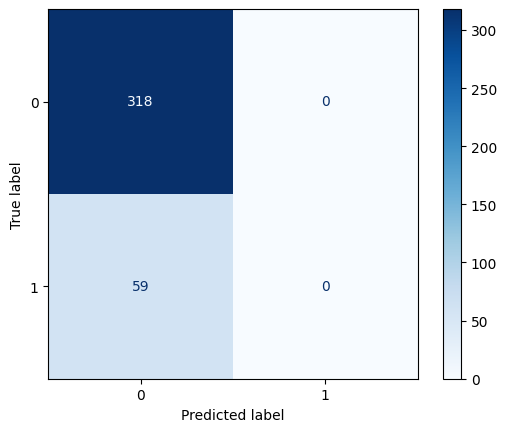

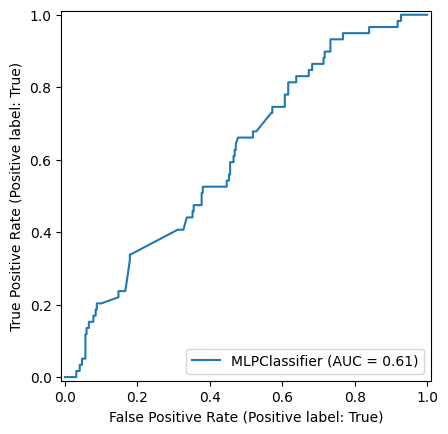

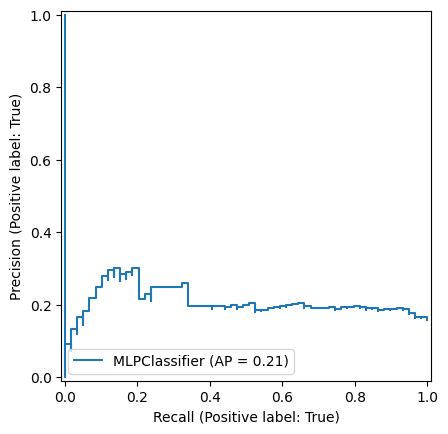

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import cross_val_score, cross_validate
import numpy as np


X_train, X_test, y_train, y_test= train_test_split(X1, y, test_size=0.2, random_state=1)

target_class = 2
y_train = X_train['Cannabis'] == target_class
X_train = X_train.drop(columns=['Cannabis'])
y_test = X_test['Cannabis'] == target_class
X_test = X_test.drop(columns=['Cannabis'])

clf = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=200, solver='sgd')
scores = cross_validate(clf, X_train, y_train, cv=5, scoring=['accuracy','f1','recall','precision'])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print(f"Accurancy: {np.mean(scores['test_accuracy'])}")
print(f"F1: {np.mean(scores['test_f1'])}")
print(f"Recall: {np.mean(scores['test_recall'])}")
print(f"Precision: {np.mean(scores['test_precision'])}")
print(f"Tp: {tp}")
print(f"Tn: {tn}")
print(f"Fp: {fp}")
print(f"Fn: {fn}")
print("")

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)

RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

PrecisionRecallDisplay.from_estimator(clf, X_test, y_test)
plt.show()
